# Currency exchange rate predictive analysis: using Regression algorithms

"There are changes in exchange rates every day that affect the income of a person, a business and can even affect the economy of a country. Thus, predicting the currency exchange rates can help an individual as well as a country in many ways."
-> In this project, the prediction is on the closed USD_INR values in each day from 16th April,2021 to 16th April, 2022.
-> Two regression techniques are used:
       - Linear regression (prediction between attributes)
       - Decision tree regression (prediction between one vs all attributes)


In [24]:
# Representing the data as a dataframe...
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import regression

sns.set()
plt.style.use('seaborn-whitegrid')

usdinr = pd.read_csv('USDINR.CSV')
del usdinr['Volume']
del usdinr['Adj Close']
usdinr.head()

,Date,Open,High,Low,Close
0,2021-04-15,75.054001,75.362999,74.744003,75.026100
1,2021-04-16,74.727402,74.836502,74.297699,74.727402
2,2021-04-19,74.541298,75.045403,74.532997,74.563202
3,2021-04-20,74.878197,75.724800,74.501999,74.878197
4,2021-04-21,75.449203,75.690002,75.283203,75.449203


In [25]:
print('Size of the dataframe (r,c):',usdinr.shape)
print('Attributes in the dataframe: ',usdinr.columns)

Size of the dataframe (r,c): (262, 5)
Attributes in the dataframe:  Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')


No handles with labels found to put in legend.
C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
No handles with labels found to put in legend.
C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and wi

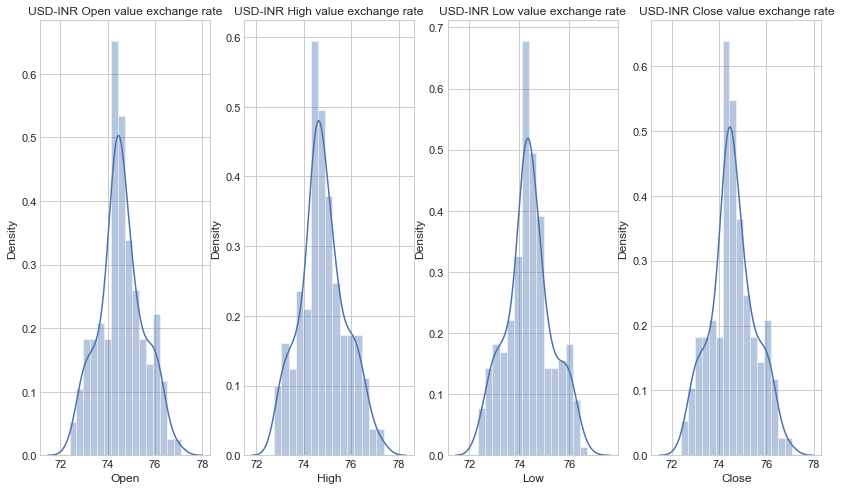

In [26]:
# Exchange rate between USD-INR..
plt.figure(figsize=(14,8))

# Lets see how data is distributed... 
# Plot-1
plt.subplot(1,4,1)
plt.title('USD-INR Open value exchange rate')
plt.legend()
sns.distplot(usdinr['Open'])

# Plot-2
plt.subplot(1,4,2)
plt.title('USD-INR High value exchange rate')
plt.legend()
sns.distplot(usdinr['High'])

# Plot-3
plt.subplot(1,4,3)
plt.title('USD-INR Low value exchange rate')
plt.legend()
sns.distplot(usdinr['Low'])

# Plot-4
plt.subplot(1,4,4)
plt.title('USD-INR Close value exchange rate')
plt.legend()
sns.distplot(usdinr['Close'])
plt.show()

**** Observartions****
-> From the above distribution plots we can see the probability density of occuring USD_INR value from opening value to closing value in a day and how they are distributed...

           Open      High       Low     Close
Open   1.000000  0.985084  0.987550  0.999323
High   0.985084  1.000000  0.980891  0.985032
Low    0.987550  0.980891  1.000000  0.987837
Close  0.999323  0.985032  0.987837  1.000000


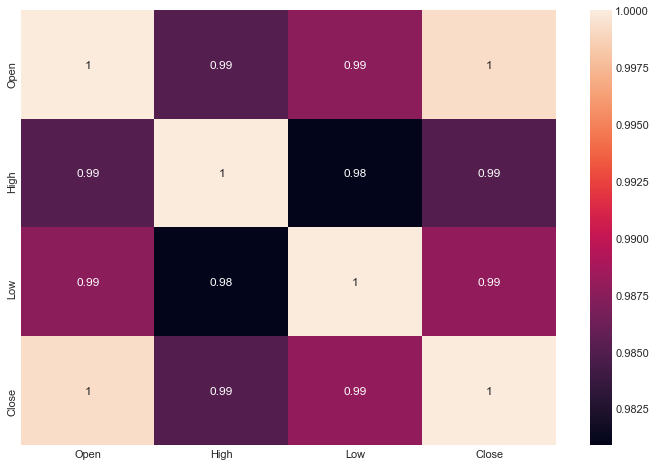

In [27]:
# Looking at the correlation between two features before training the data..
plt.figure(figsize = (12,8))
print(usdinr.corr())
sns.heatmap(usdinr.corr(),annot = True)
plt.show()

-> Heatmap plot hepls us to show the correlation between two features.
-> All the features are almost correlated to each other.

In [28]:
# Standard form of regression line is 'Y = mX + c'
# Y: dependent variable
# X: independent variable
# here m = slope of the line and c = constant

def regline_conts(x1,y1): # Function for finding m and c in reg line & for training the data...
    x1_mean = np.mean(x1)
    y1_mean = np.mean(y1)

    numer = 0
    denom = 0

    for i in range(len(x1)):
        numer += (x1[i]-x1_mean) * (y1[i]-y1_mean) #covarience
        denom += (x1[i]-x1_mean)**2                #varience
    m1 = numer/denom
    c1 = y1_mean - (m1 * x1_mean)
    numer = 0
    denom = 0
    return(m1,c1)


# R_score (root mean square method)
def rootmeansq(x1,y1): # Function for fitting , predicting & finding the accuracy of the model
    m1,c1 = regline_conts(x1,y1)
    y1_mean = np.mean(y1)
    ss_t = 0
    ss_r = 0
    for i in range(len(x1)):
        pred = c1 + m1 * x1
        ss_t += (y1[i] - y1_mean)**2
        ss_r += (y1[i]- pred[i])**2
    r_sq = 1-(ss_r/ss_t)
    print('Predicted values: \n',pred[0:5])
    return r_sq

    

    

Intercept and coeficent in regression line m = 0.995, c = 0.334
Predicted values: 
 0    75.049932
1    74.724802
2    74.539536
3    74.874919
4    75.443355
Name: Open, dtype: float64
R_score(accuracy) of the fit is:  0.999


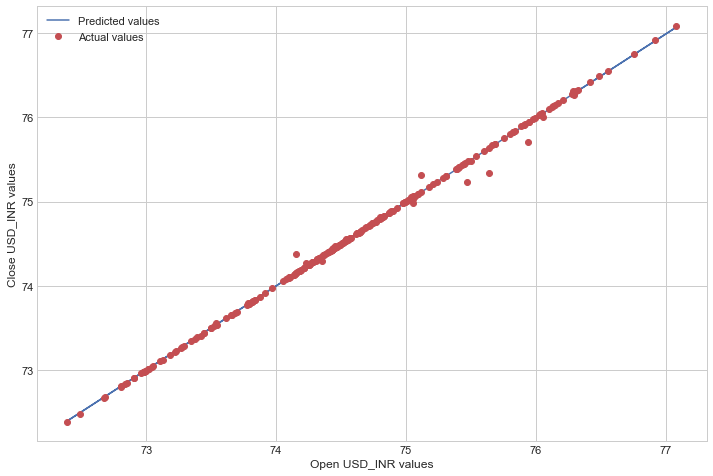

In [29]:
# Predicting the USd-INR close values taking Open values as 
x1 = usdinr['Open']
y1 = usdinr['Close']

x1_mean = np.mean(x1)
y1_mean = np.mean(y1)

m1,c1 = regline_conts(x1,y1)
y1pred = c1 + m1 * x1
print('Intercept and coeficent in regression line m = {}, c = {}'.format(round(m1,3),round(c1,3)))
print('R_score(accuracy) of the fit is: ',round(rootmeansq(x1,y1),3))
y1pred = c1 + m1 * x1
plt.figure(figsize = (12,8))
plt.plot(x1,y1pred,label = 'Predicted values')
plt.plot(x1,y1,'ro',label = 'Actual values')
plt.title('')
plt.legend()
plt.xlabel('Open USD_INR values')
plt.ylabel('Close USD_INR values')

plt.show()


**** Observartions****
-> From the above plot, blue line is the regression line(predicted values) for closed and opened USD_INR values.
-> The root mean square value for the above regression is 0.99 which is 99.9% accuray i.e the predicted values are almost as same the actual values.
-> Red points are  Open and Close values scattered in the plot.
-> This fit is the best fit for the prediction of Currency exchange rate for closed values in each day.

Intercept and coeficent in regression line m = 0.955, c = 3.124
Predicted values: 
 0    75.109182
1    74.606286
2    74.805823
3    75.454764
4    75.421526
Name: High, dtype: float64
R_score(accuracy) of the fit is:  0.97


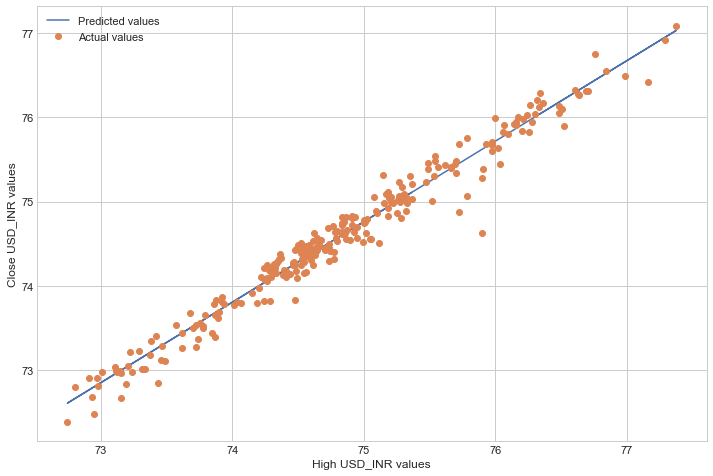

In [30]:
x2 = usdinr['High']
y2 = usdinr['Close']

x2_mean = np.mean(x2)
y2_mean = np.mean(y2)
m2,c2 = regline_conts(x2,y2)
print('Intercept and coeficent in regression line m = {}, c = {}'.format(round(m2,3),round(c2,3)))
print('R_score(accuracy) of the fit is: ',round(rootmeansq(x2,y2),3))
y2pred = c2 + m2 * x2
plt.figure(figsize = (12,8))
plt.plot(x2,y2pred,label = 'Predicted values')
plt.plot(x2,y2,'o',label = 'Actual values')
plt.title('')
plt.legend()
plt.xlabel('High USD_INR values')
plt.ylabel('Close USD_INR values')

plt.show()

**** Observartions****
-> From the above plot, blue line is the regression line(predicted values) for closed and Low USD_INR values.
-> The root mean square value for the above regression is 0.97 i.e the predicted values are almost same as the actual values of closed column.
-> Yellow points are High and Close values scattered in the plot.
-> This fit can also be a good fit.

Intercept and coeficent in regression line m = 1.005, c = -0.214
Predicted values: 
 0    74.932593
1    74.483885
2    74.720450
3    74.689285
4    75.474697
Name: Low, dtype: float64
R_score(accuracy) of the fit is:  0.976


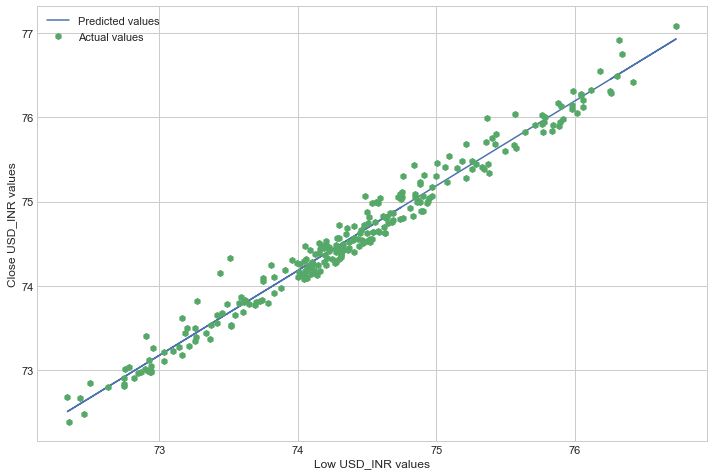

In [31]:
x3 = usdinr['Low']
y3 = usdinr['Close']

x3_mean = np.mean(x3)
y3_mean = np.mean(y3)
m3,c3 = regline_conts(x3,y3)
print('Intercept and coeficent in regression line m = {}, c = {}'.format(round(m3,3),round(c3,3)))
print('R_score(accuracy) of the fit is: ',round(rootmeansq(x3,y3),3))
y3pred = c3 + m3 * x3
plt.figure(figsize = (12,8))
plt.plot(x3,y3pred,label = 'Predicted values')
plt.plot(x3,y3,'gh',label = 'Actual values')
plt.title('')
plt.legend()
plt.xlabel('Low USD_INR values')
plt.ylabel('Close USD_INR values')

plt.show()

**** Observartions****
-> From the above plot, blue line is the regression line(predicted values) for closed and Low USD_INR values.
-> The root mean square value for the above regression is 0.97 i.e the predicted values are almost same as the actual values of closed column.
-> Green points are Low and Close values scattered in the plot.
-> This can be a good fit.

C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\Charanteja\New folder\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `hist

,Pred Close_val from Open_val,Pred Close_val from High_val,Pred Close_val from Low_val
0,75.049932,75.109182,74.932593
1,74.724802,74.606286,74.483885
2,74.539536,74.805823,74.720450
3,74.874919,75.454764,74.689285
4,75.443355,75.421526,75.474697


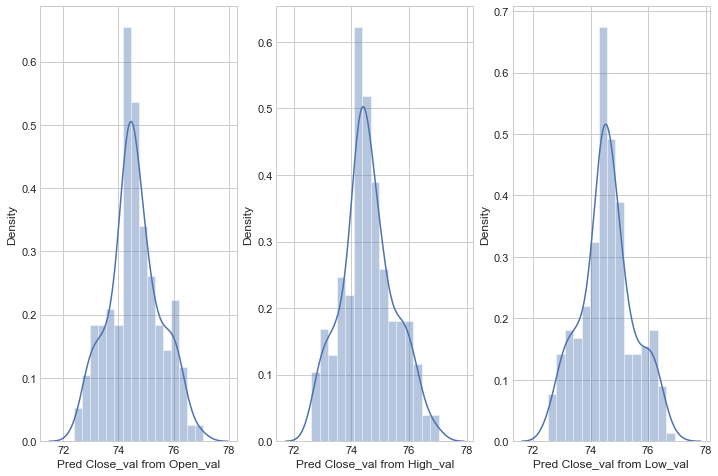

In [32]:
# Dataframe and distribution of predicted values from different attributes..
pred = pd.DataFrame()
pred['Pred Close_val from Open_val'] = y1pred
pred['Pred Close_val from High_val'] = y2pred
pred['Pred Close_val from Low_val'] = y3pred

plt.figure(figsize = (12,8))
plt.subplot(1,3,1)
sns.distplot(pred['Pred Close_val from Open_val'])

plt.subplot(1,3,2)
sns.distplot(pred['Pred Close_val from High_val'])

plt.subplot(1,3,3)
sns.distplot(pred['Pred Close_val from Low_val'])
pred.head()


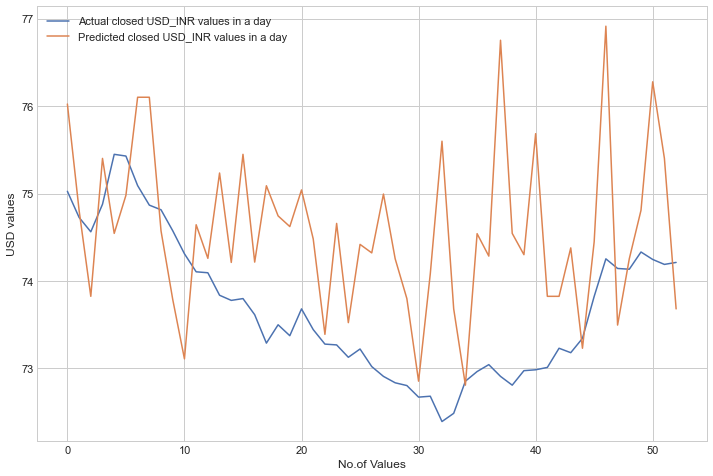

Predicted values: 
 0    75.044446
1    74.938742
2    74.880634
3    74.992106
4    75.194176
Name: Actual value, dtype: float64
R_score(accuracy) of the fit is:  0.907


In [33]:
def rootmeansq1(x1,y1): # Function for fitting , predicting & finding the accuracy of the model
    m1,c1 = regline_conts(x1,y1)
    y1_mean = np.mean(y1)
    ss_t = 0
    ss_r = 0
    for i in range(len(x1)):
        pred = c1 + m1 * x1
        ss_t += (y1[i] - y1_mean)**2
        ss_r += (y1[i]- pred[i])**2
    r_sq = (ss_r/ss_t)
    print('Predicted values: \n',pred[0:5])
    return r_sq
# Using decision tree model
# Prediction of the target values(close values) using Open, High & Low..
from sklearn.model_selection import train_test_split
x = usdinr[['Open','High','Low']]
y = usdinr['Close']
x = x.to_numpy()
y=y.to_numpy()
y = y.reshape(-1,1)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=42)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
ypred = model.predict(xtest)

data = pd.DataFrame(data={"Predicted value": ypred.flatten()})
data['Date'] = usdinr['Date']
data['Actual value'] = usdinr['Close']
data.head()
# print(data.shape)
plt.figure(figsize = (12,8))
plt.plot(data['Actual value'],label = 'Actual closed USD_INR values in a day')
plt.plot(data['Predicted value'],label = 'Predicted closed USD_INR values in a day')
plt.legend()
plt.xlabel('No.of Values')
plt.ylabel('USD values')
plt.show()
print('R_score(accuracy) of the fit is: ',round(rootmeansq1(data['Actual value'],data['Predicted value']),3))

**** Observartions****
-> From above plot there is a more difference between actual values and predicted values.
-> The accuracy we got for this fit is very low: 90.3% i.e, the prediction of target values is not useful from open, high and low values.
-> So this might not a good fit.

**Conclusions**:
-> After doing many predictive analysis, the most accurate Currency exchange rate prediction is done using 'Open' values since the accuracy we got for that model fit is 99.9% score.
-> Prediction from 'High' and 'Low' values are also accurate having 97.0% and 97.6% score.
-> This prediction is done using only one year data set from 16th April,2021 to 16th April, 2022.
-> The accuray for predicting target values may or may not chage if we take large range of data i.e, using data of having a centuries of records in it.
-> So, based on the one year historical data of currency exchange rate we predict accurate values based on the open values which start in each day which might be useful for some business or economic purposes.